In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
model_dir = "llama-moe/LLaMA-MoE-v1-3_5B-4_16"
tokenizer = AutoTokenizer.from_pretrained(model_dir, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_dir, torch_dtype=torch.bfloat16, trust_remote_code=True)
model.eval()
model.to("cuda:0")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/796 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

configuration_llama_moe.py:   0%|          | 0.00/4.41k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/llama-moe/LLaMA-MoE-v1-3_5B-4_16:
- configuration_llama_moe.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_llama_moe_hf.py:   0%|          | 0.00/66.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/llama-moe/LLaMA-MoE-v1-3_5B-4_16:
- modeling_llama_moe_hf.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin.index.json:   0%|          | 0.00/174k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/182k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

LlamaMoEForCausalLM(
  (model): LlamaMoEModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=0)
    (layers): ModuleList(
      (0-31): 32 x LlamaMoEDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LinearGLUMoELayer(
          (gate): TopKBalancedNoisyGate(
            (gate_network): Sequential(
              (0): Linear(in_features=4096, out_features=16, bias=False)
              (1): Tanh()
              (2): Linear(in_features=16, out_features=16, bias=False)
            )
            (softmax): Softmax(dim=1)
            (weight_noise): Linear(in_features=4096, out_features=16, bias=False)
           

In [ ]:
!pip install -U "huggingface_hub[cli]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.2/481.2 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.29.3
    Uninstalling huggingface-hub-0.29.3:
      Successfully uninstalled huggingface-hub-0.29.3


In [ ]:
!huggingface-cli download miike-ai/mathqa --repo-type dataset\
  --local-dir ./math_qa

!huggingface-cli download medalpaca/medical_meadow_wikidoc --repo-type dataset\
--local-dir ./medical_qa1

Fetching 2 files: 100% 2/2 [00:00<00:00, 2292.60it/s]
/content/math_qa
Fetching 3 files:   0% 0/3 [00:00<?, ?it/s]Downloading '.gitattributes' to 'medical_qa1/.cache/huggingface/download/wPaCkH-WbT7GsmxMKKrNZTV4nSM=.0579533734254cab8254720d28d882b8f14c0404.incomplete'

medical_meadow_wikidoc.json: 100% 10.6M/10.6M [00:00<00:00, 157MB/s]
Download complete. Moving file to medical_qa1/medical_meadow_wikidoc.json

.gitattributes: 100% 2.33k/2.33k [00:00<00:00, 19.2MB/s]
Download complete. Moving file to medical_qa1/.gitattributes
Fetching 3 files:  33% 1/3 [00:00<00:01,  1.95it/s]
README.md: 100% 1.41k/1.41k [00:00<00:00, 10.1MB/s]
Download complete. Moving file to medical_qa1/README.md
Fetching 3 files: 100% 3/3 [00:00<00:00,  4.92it/s]
/content/medical_qa1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch

input_text = "Paris is famous for"
inputs = tokenizer(input_text, return_tensors="pt")
inputs = inputs.to("cuda:0")
# embeddings = model.embeddings.word_embeddings(model_inputs['input_ids'])
# embeddings.retain_grad()

outputs = model(**inputs)


# loss = outputs.last_hidden_state.sum()
# loss.backward()

# gradients = embeddings.grad
# average_gradients = gradients[0].mean(dim=1).detach().numpy()

# plt.plot(average_gradients, marker='o')
# plt.title("Averaged Gradients for Input Tokens")
# plt.xlabel("Token Index")
# plt.ylabel("Average Gradient Value")
# plt.xticks(ticks=range(len(average_gradients)), labels=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]), rotation=45)
# plt.grid(True)
# plt.show()


In [ ]:
print(outputs.keys())

odict_keys(['logits', 'past_key_values', 'balance_loss', 'num_dropped_tokens', 'gate_load', 'gate_importance'])


In [ ]:
import
out = tokenizer.decode(outputs)
print(out)

In [ ]:
print(inputs['input_ids'].shape)

torch.Size([1, 7])


In [ ]:
print(len(outputs["gate_importance"]))
print(len(outputs["gate_importance"][0]))
print(outputs["gate_importance"][0])

32
16
tensor([0.9297, 0.0000, 0.1553, 0.0000, 0.1953, 0.7500, 0.0000, 0.5195, 0.0000,
        0.2480, 0.4785, 0.8750, 0.2451, 0.2344, 0.0000, 0.3672],
       device='cuda:0', dtype=torch.bfloat16, grad_fn=<SumBackward1>)


In [ ]:
{"question": "John completed a simple test-time scaling task in 30 minutes in July, and then he took twice as long to complete the same task in August. How much time did John take altogether to complete the task in July and August

In [ ]:
# python>=3.10

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_dir = "llama-moe/LLaMA-MoE-v1-3_0B-2_16"
tokenizer = AutoTokenizer.from_pretrained(model_dir, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_dir, torch_dtype=torch.bfloat16, trust_remote_code=True)
model.eval()
model.to("cuda:0")

input_text = "John completed a simple test-time scaling task in 30 minutes in July, and then he took twice as long to complete the same task in August. The time did John take altogether to complete the task in July and August is"
inputs = tokenizer(input_text, return_tensors="pt")
inputs = inputs.to("cuda:0")

pred = model.generate(**inputs, max_length=128, temperature=0.01)
print("Response:",tokenizer.decode(pred.cpu()[0], skip_special_tokens=True))
# print(pred.keys())
# Suzhou is famous of its beautiful gardens. The most famous one is the Humble Administrator's Garden. It is a classical Chinese garden with a history of more than 600 years. The garden is divided into three


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Response: John completed a simple test-time scaling task in 30 minutes in July, and then he took twice as long to complete the same task in August. The time did John take altogether to complete the task in July and August is 60 minutes. What was the time taken by John to complete the task in August?
The time taken by John to complete the task in July is 30 minutes.
The time taken by John to complete the task in August is 60 minutes.
The time taken by John to complete the task in July is 30 minutes.
The time taken by John to


In [ ]:
import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def generate_heatmap(outputs):
  matrix = []

  for i in range(len(outputs["gate_importance"])):
      # row = []
      row = outputs["gate_importance"][i].to(torch.float32).detach().cpu().numpy()
      row = normalize(row)
      # row = softmax(row)
      print(row)
      matrix.append(row)

  matrix = np.array(matrix)

  return matrix

# matrix = generate_heatmap(outputs)

# plt.figure(figsize=(10, 8))
# plt.imshow(matrix, cmap='viridis', aspect='auto')
# plt.colorbar(label='Value')

# plt.title('Heatmap of gate activation Matrix')
# plt.xlabel('Expert Index')
# plt.ylabel('Token Index')

# plt.tight_layout()
# plt.show()

In [ ]:
with open("/content/medical_qa1/medical_meadow_wikidoc.json", "r") as f:
    dataset_infos = json.load(f)
# print(dataset_infos)

In [ ]:
med_data = dataset_infos[:500]

In [ ]:
import json

math_data = []
with open('/content/math_qa/dataset_20250207_203543.jsonl', 'r', encoding='utf-8') as f:
    for line in f:
        math_data.append(json.loads(line))
print("Number of data:", len(math_data))

Number of data: 794


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
model_dir = "llama-moe/LLaMA-MoE-v1-3_5B-4_16"
tokenizer = AutoTokenizer.from_pretrained(model_dir, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_dir, torch_dtype=torch.bfloat16, trust_remote_code=True)
model.eval()
model.to("cuda:0")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/796 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

configuration_llama_moe.py:   0%|          | 0.00/4.41k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/llama-moe/LLaMA-MoE-v1-3_5B-4_16:
- configuration_llama_moe.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_llama_moe_hf.py:   0%|          | 0.00/66.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/llama-moe/LLaMA-MoE-v1-3_5B-4_16:
- modeling_llama_moe_hf.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin.index.json:   0%|          | 0.00/174k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/182k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

LlamaMoEForCausalLM(
  (model): LlamaMoEModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=0)
    (layers): ModuleList(
      (0-31): 32 x LlamaMoEDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LinearGLUMoELayer(
          (gate): TopKBalancedNoisyGate(
            (gate_network): Sequential(
              (0): Linear(in_features=4096, out_features=16, bias=False)
              (1): Tanh()
              (2): Linear(in_features=16, out_features=16, bias=False)
            )
            (softmax): Softmax(dim=1)
            (weight_noise): Linear(in_features=4096, out_features=16, bias=False)
           

In [ ]:
print(list(med_data))

[{'instruction': 'Answer this question truthfully', 'input': "Can you provide an overview of the lung's squamous cell carcinoma?", 'output': 'Squamous cell carcinoma of the lung may be classified according to the WHO histological classification system into 4 main types: papillary, clear cell, small cell, and basaloid.'}, {'instruction': 'Answer this question truthfully', 'input': 'What does "Clear: cell" mean?', 'output': 'Clear cell tumors are part of the surface epithelial-stromal tumor group of Ovarian cancers, accounting for 6% of these neoplastic cases. Clear cell tumors are also associated with the pancreas and salivary glands.\nBenign and borderline variants of this neoplasm are rare, and most cases are malignant.\nTypically, they are cystic neoplasms with polypoid masses that protrude into the cyst.\nOn microscopic pathological examination, they are composed of cells with clear cytoplasm (that contains glycogen) and hob nail cells (from which the glycogen has been secreted).\nT

In [ ]:
from tqdm import tqdm
def infer(model, tokenizer, input_text):
    inputs = tokenizer(input_text, return_tensors="pt")
    inputs = inputs.to("cuda:0")
    pred = model(**inputs, max_length=256, temperature=0.01)
    gate_list = []
    for t in pred.gate_importance:
      res = t.to(torch.float32).detach().cpu().numpy()
      gate_list.append(res)
    return np.array(gate_list)

In [ ]:
pred = infer(model, tokenizer, input_text)
print(pred.shape)

(32, 16)


In [ ]:
math_data_inferred = []
medical_data_inferred = []

for i in tqdm(range(20)):
  input_text = math_data[i]["question"]
  input_med_text = med_data[i]["input"]
  medical_data_inferred.append(infer(model, tokenizer, input_med_text))
  math_data_inferred.append(infer(model, tokenizer, input_text))

100%|██████████| 20/20 [00:07<00:00,  2.53it/s]


In [ ]:
def calculate_cov_matrix(data):
    data = np.array(data)
    mean = np.mean(data, axis=0)
    cov_matrix = np.cov(data.T)
    return mean, cov_matrix

In [ ]:
math_data_inferred = np.array(math_data_inferred)
print(math_data_inferred.shape)

(20, 32, 16)


In [ ]:
medical_data_inferred = np.array(medical_data_inferred)
print(medical_data_inferred.shape)

(20, 32, 16)


In [ ]:
gate

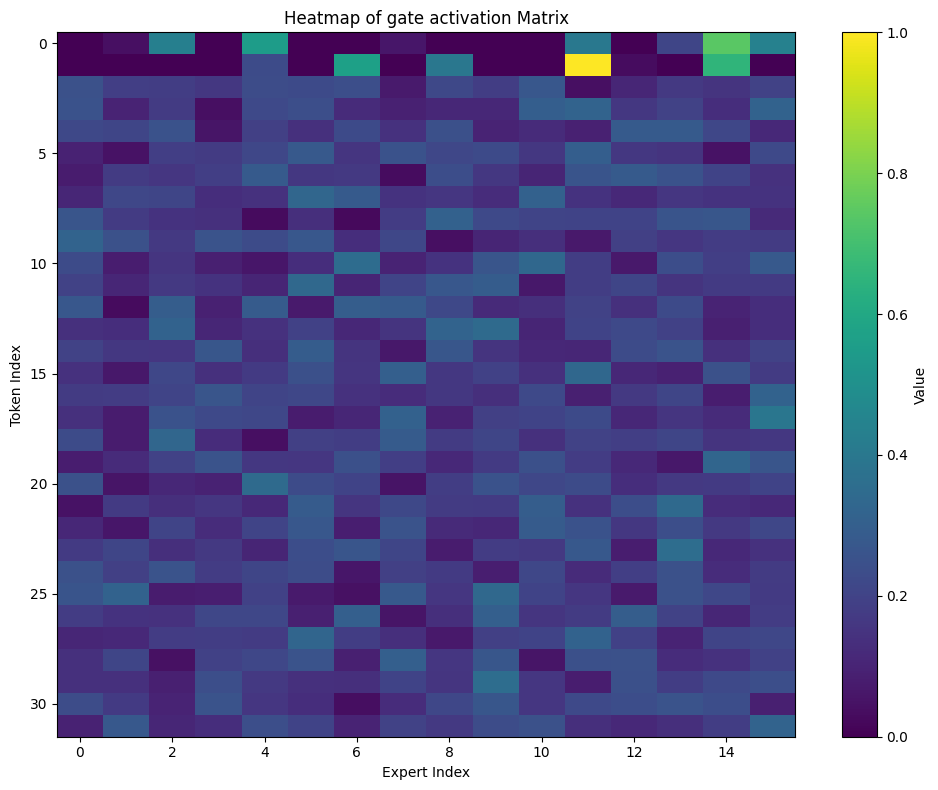

In [ ]:
mean_med = np.mean(medical_data_inferred, axis=0)
med_matrix = normalize(mean_med)
# print(matrix)
plt.figure(figsize=(10, 8))
plt.imshow(med_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')

plt.title('Heatmap of gate activation Matrix')
plt.xlabel('Expert Index')
plt.ylabel('Token Index')

plt.tight_layout()
plt.show()

[[0.00336416 0.09188446 0.4444759  0.         0.5186023  0.
  0.0011096  0.03062668 0.         0.         0.         0.3092375
  0.         0.20621727 0.6613382  0.31836185]
 [0.00116707 0.         0.         0.         0.22167207 0.
  0.2971778  0.         0.35546044 0.         0.         1.
  0.1099519  0.         0.5993776  0.        ]
 [0.14477825 0.2024862  0.08715872 0.20024048 0.25809872 0.16108184
  0.09553597 0.1017117  0.2158898  0.13880146 0.24179515 0.0785737
  0.18282288 0.14575523 0.17125387 0.15834983]
 [0.11512413 0.25045976 0.1301236  0.07564498 0.19297284 0.17576744
  0.17078087 0.10358608 0.18952468 0.18307045 0.14457048 0.19673927
  0.13730726 0.17523694 0.14293039 0.20048805]
 [0.13193166 0.213927   0.13553897 0.15279742 0.19228321 0.16613027
  0.15325718 0.16987905 0.18745579 0.10981928 0.16557327 0.11614089
  0.24469514 0.16406138 0.11211804 0.1684821 ]
 [0.15051633 0.17918022 0.09358422 0.18742043 0.16853514 0.13942477
  0.11278115 0.2088697  0.17810157 0.203998

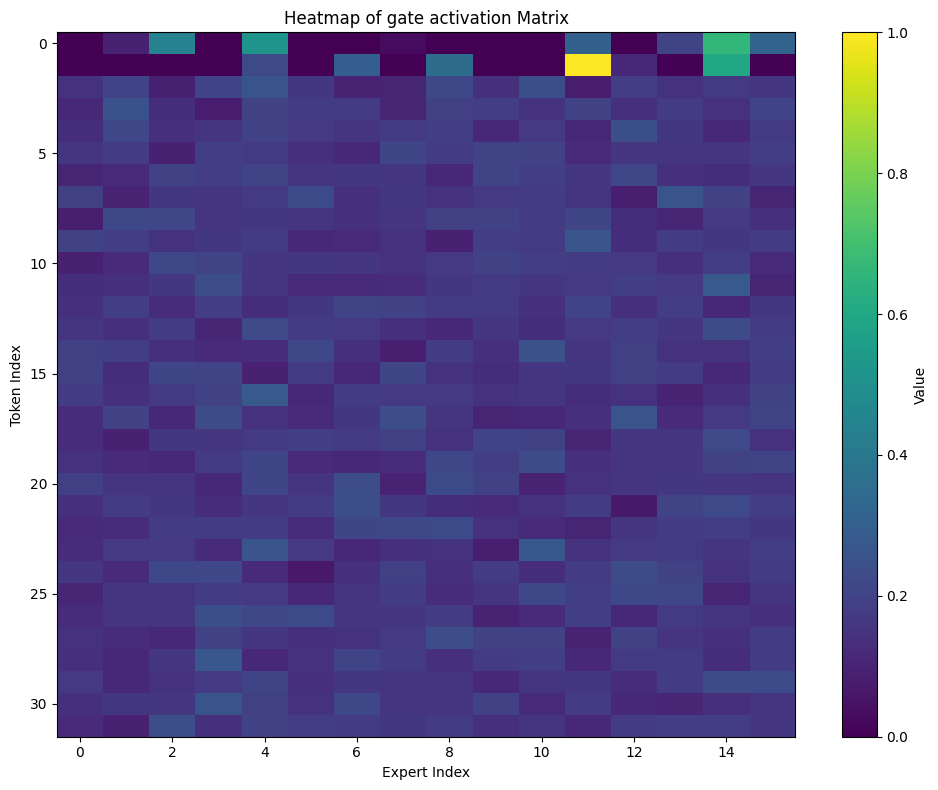

In [ ]:
mean_math = np.mean(math_data_inferred, axis=0)
matrix = normalize(mean_math)
print(matrix)
plt.figure(figsize=(10, 8))
plt.imshow(matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')

plt.title('Heatmap of gate activation Matrix')
plt.xlabel('Expert Index')
plt.ylabel('Token Index')

plt.tight_layout()
plt.show()